In [1]:
# 1. Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')   # Authorize when prompted

import pandas as pd
import os
import glob
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Search in your entire Google Drive (may take some time)
file_paths = glob.glob('/content/drive/MyDrive/sorted_df_var_*.csv', recursive=True)

# Extract just the filenames
file_names = [os.path.basename(path) for path in file_paths]

# Sort the filenames alphabetically
file_names.sort()

print(type(file_names))

# Print the sorted filenames
for name in file_names:
    print(name)

print(file_names[-1])

csv_path = '/content/drive/MyDrive/' + file_names[-1]

<class 'list'>
sorted_df_var_202506171543.csv
sorted_df_var_202506192121.csv
sorted_df_var_202506192139.csv
sorted_df_var_202506192139.csv


In [3]:
# Search in your entire Google Drive (may take some time)
lstm_file_paths = glob.glob('/content/drive/MyDrive/LSTM_results/best_KGE/best_KGE_result_*.csv', recursive=True)

# Extract just the filenames
lstm_file_names = [os.path.basename(path) for path in lstm_file_paths]

# Sort the filenames alphabetically
lstm_file_names.sort()




# Print the sorted filenames
for name in lstm_file_names:
    print(name)

print(lstm_file_names[-1])

lstm_csv_path = '/content/drive/MyDrive/LSTM_results/best_KGE/' + lstm_file_names[-1]

best_KGE_result_202506171720.csv
best_KGE_result_202506171733.csv
best_KGE_result_202506171746.csv
best_KGE_result_202506171853.csv
best_KGE_result_202506171900.csv
best_KGE_result_202506171905.csv
best_KGE_result_202506171906.csv
best_KGE_result_202506171917.csv
best_KGE_result_202506171925.csv
best_KGE_result_202506171932.csv
best_KGE_result_202506171940.csv
best_KGE_result_202506171943.csv
best_KGE_result_202506171947.csv
best_KGE_result_202506171950.csv
best_KGE_result_202506172040.csv
best_KGE_result_202506172105.csv
best_KGE_result_202506172109.csv
best_KGE_result_202506172115.csv
best_KGE_result_202506172119.csv
best_KGE_result_202506172125.csv
best_KGE_result_202506172130.csv
best_KGE_result_202506172152.csv
best_KGE_result_202506192325.csv
best_KGE_result_202506192334.csv
best_KGE_result_202506192339.csv
best_KGE_result_202506192344.csv
best_KGE_result_202506192354.csv
best_KGE_result_202506200009.csv
best_KGE_result_202506200012.csv
best_KGE_result_202506200047.csv
best_KGE_r

In [4]:



rf = pd.read_csv( csv_path )
print(rf)
# Print column data types
#print(rf.dtypes)

lstm = pd.read_csv( lstm_csv_path)
lstm['model_site'] = lstm['model_site'].astype('Int64')

print(lstm)
#print(lstm.dtypes)

    Unnamed: 0   site_no  number_of_obs       MSE      BIAS      RMSE  \
0            0  13310800           1103  0.315464 -0.217739  0.561662   
1            1  13192200            820  0.326945  0.144117  0.571791   
2            2  13311450           1098  0.357845 -0.174490  0.598202   
3            3  13311000           1101  0.386968 -0.117419  0.622068   
4            4  13154500           2088  0.410202 -0.041550  0.640470   
5            5  13092747           1377  0.484580 -0.071572  0.696118   
6            6  13211205            753  0.529429 -0.309338  0.727619   
7            7  13311250           1012  0.537925 -0.007768  0.733434   
8            8  13317660           1748  0.596277  0.045260  0.772190   
9            9  13310850           1042  0.712444 -0.500005  0.844064   
10          10  13296000            995  0.760408 -0.256101  0.872014   
11          11  13150430           1919  0.804744  0.175230  0.897075   
12          12  13307000            786  0.917044 -

In [5]:
merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')
#merged_df['KGE_y'] = merged_df['KGE_y']#.astype('float64')

#merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)


merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[1:6])
merged_df['KGE_y'] = merged_df['KGE_y'].astype('float64')

merged_df = merged_df[ ['site_no', 'KGE_x', 'KGE_y'] ]

merged_df.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

print(merged_df.dtypes)
print(merged_df)

site_no            int64
Random Forest    float64
LSTM             float64
dtype: object
     site_no  Random Forest   LSTM
0   13310800       0.926769  0.945
1   13192200       0.859797  0.937
2   13311450       0.907758  0.937
3   13311000       0.939221  0.953
4   13154500       0.729285  0.971
5   13092747       0.704597  0.964
6   13211205       0.889599  0.972
7   13311250       0.906752  0.960
8   13317660       0.915618  0.968
9   13310850       0.904339  0.915
10  13296000       0.875657  0.934
11  13150430       0.866316  0.908
12  13307000       0.909612  0.975
13  13341050       0.712652  0.921
14  13342500       0.752785  0.917
15  13190500       0.688853  0.806
16  13340600       0.943870  0.956
17  12305000       0.779612  0.924
18  13304050       0.498039  0.534
19  13340000       0.945548  0.982
20  13176400       0.841286  0.944
21  12322000       0.673606  0.901


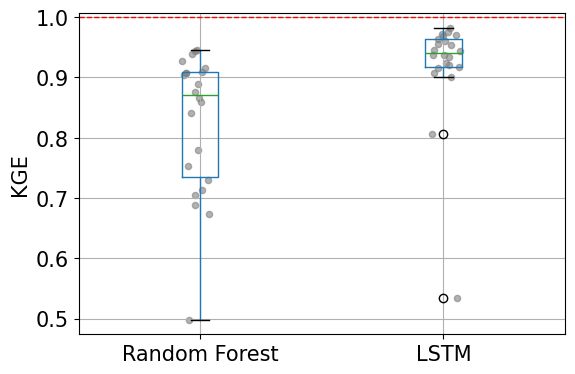

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(6, 4))

merged_df[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = merged_df[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

# Add horizontal line at y=1
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

ax.set_ylabel( "KGE")
plt.tight_layout()

# Save the figure
plt.savefig("kge.png")  # Saves as a PNG file

plt.show()

Index(['Unnamed: 0', 'site_no', 'number_of_obs', 'MSE', 'BIAS', 'RMSE', 'NSE',
       'KGE', 'KGE_Alpha', 'KGE_Beta', 'std_dev_st', 'cv_q', 'inter_cv_q',
       'inter_cv_st', 'range', 'autocorr_t_1', 'grid_std_ratio',
       'grid_correlation'],
      dtype='object')
Index(['Unnamed: 0', 'current_time', 'model_site', 'train_month', 'h1', 'h2',
       'd1', 'd2', 'batch', 'look_back', 'optimizer', 'learning_rate', 'r2',
       'rmse', 'bias', 'std_ratio', 'correlation', 'KGE', 'KGE_r_comp',
       'KGE_alpha_comp', 'KGE_beta_comp'],
      dtype='object')
site_no            int64
Random Forest    float64
LSTM             float64
dtype: object
merged_df_KGE_r_comp      site_no  Random Forest   LSTM
0   13310800       0.945224  0.977
1   13192200       0.937290  0.952
2   13311450       0.958200  0.982
3   13311000       0.945355  0.980
4   13154500       0.835240  0.981
5   13092747       0.832122  0.983
6   13211205       0.957531  0.977
7   13311250       0.959334  0.966
8   13317660  

/tmp/ipython-input-7-66534640.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_r_comp['LSTM'] = merged_df_KGE_r_comp['LSTM'].apply(lambda x: x[1:6])
/tmp/ipython-input-7-66534640.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_r_comp['LSTM'] = merged_df_KGE_r_comp['LSTM'].astype('float64')


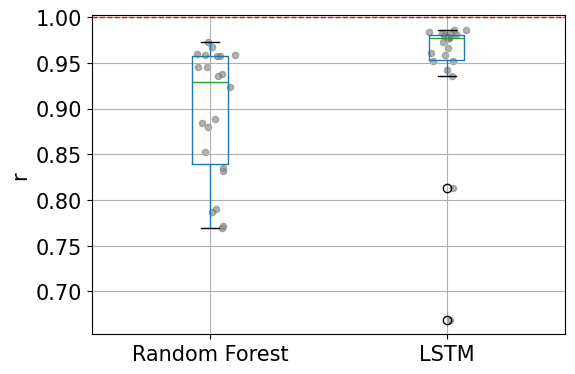

In [7]:
print(rf.columns)
print(lstm.columns)

merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')

merged_df_KGE_r_comp = merged_df[ ['site_no', 'grid_correlation', 'KGE_r_comp'] ]

merged_df_KGE_r_comp.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

merged_df_KGE_r_comp['LSTM'] = merged_df_KGE_r_comp['LSTM'].apply(lambda x: x[1:6])
merged_df_KGE_r_comp['LSTM'] = merged_df_KGE_r_comp['LSTM'].astype('float64')

print(merged_df_KGE_r_comp.dtypes)

print("merged_df_KGE_r_comp",merged_df_KGE_r_comp)

plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(6, 4))

merged_df_KGE_r_comp[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = merged_df_KGE_r_comp[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

# Add horizontal line at y=1
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

ax.set_ylabel( "r")
plt.tight_layout()

# Save the figure
plt.savefig("kge_r.png")  # Saves as a PNG file

plt.show()


Index(['Unnamed: 0', 'site_no', 'number_of_obs', 'MSE', 'BIAS', 'RMSE', 'NSE',
       'KGE', 'KGE_Alpha', 'KGE_Beta', 'std_dev_st', 'cv_q', 'inter_cv_q',
       'inter_cv_st', 'range', 'autocorr_t_1', 'grid_std_ratio',
       'grid_correlation'],
      dtype='object')
Index(['Unnamed: 0', 'current_time', 'model_site', 'train_month', 'h1', 'h2',
       'd1', 'd2', 'batch', 'look_back', 'optimizer', 'learning_rate', 'r2',
       'rmse', 'bias', 'std_ratio', 'correlation', 'KGE', 'KGE_r_comp',
       'KGE_alpha_comp', 'KGE_beta_comp'],
      dtype='object')
site_no            int64
Random Forest    float64
LSTM             float64
dtype: object
merged_df_KGE_alpha_comp      site_no  Random Forest   LSTM
0   13310800       0.958528  0.950
1   13192200       1.124802  0.960
2   13311450       0.919909  0.940
3   13311000       1.023751  0.972
4   13154500       0.785208  1.022
5   13092747       0.756972  0.978
6   13211205       0.899286  0.985
7   13311250       0.916090  0.983
8   133176

/tmp/ipython-input-8-1495558806.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_alpha_comp['LSTM'] = merged_df_KGE_alpha_comp['LSTM'].apply(lambda x: x[1:6])
/tmp/ipython-input-8-1495558806.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_alpha_comp['LSTM'] = merged_df_KGE_alpha_comp['LSTM'].astype('float64')


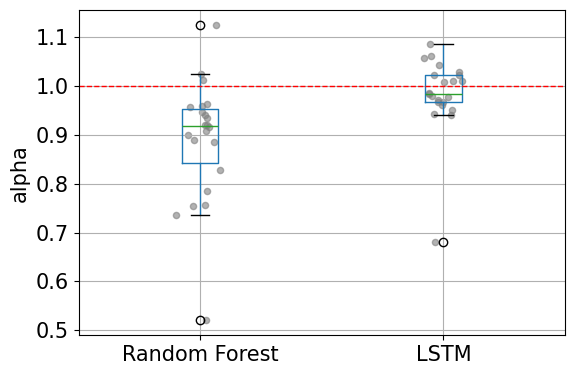

In [8]:
print(rf.columns)
print(lstm.columns)

merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')

merged_df_KGE_alpha_comp = merged_df[ ['site_no', 'KGE_Alpha', 'KGE_alpha_comp'] ]

merged_df_KGE_alpha_comp.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

merged_df_KGE_alpha_comp['LSTM'] = merged_df_KGE_alpha_comp['LSTM'].apply(lambda x: x[1:6])
merged_df_KGE_alpha_comp['LSTM'] = merged_df_KGE_alpha_comp['LSTM'].astype('float64')

print(merged_df_KGE_alpha_comp.dtypes)

print("merged_df_KGE_alpha_comp",merged_df_KGE_alpha_comp)

plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(6, 4))

merged_df_KGE_alpha_comp[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = merged_df_KGE_alpha_comp[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

# Add horizontal line at y=1
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

ax.set_ylabel( "alpha")
plt.tight_layout()

# Save the figure
plt.savefig("kge_ALPHA.png")  # Saves as a PNG file

plt.show()

Index(['Unnamed: 0', 'site_no', 'number_of_obs', 'MSE', 'BIAS', 'RMSE', 'NSE',
       'KGE', 'KGE_Alpha', 'KGE_Beta', 'std_dev_st', 'cv_q', 'inter_cv_q',
       'inter_cv_st', 'range', 'autocorr_t_1', 'grid_std_ratio',
       'grid_correlation'],
      dtype='object')
Index(['Unnamed: 0', 'current_time', 'model_site', 'train_month', 'h1', 'h2',
       'd1', 'd2', 'batch', 'look_back', 'optimizer', 'learning_rate', 'r2',
       'rmse', 'bias', 'std_ratio', 'correlation', 'KGE', 'KGE_r_comp',
       'KGE_alpha_comp', 'KGE_beta_comp'],
      dtype='object')
site_no            int64
Random Forest    float64
LSTM             float64
dtype: object
merged_df_KGE_beta_comp      site_no  Random Forest   LSTM
0   13310800       0.974654  1.002
1   13192200       1.012200  0.998
2   13311450       0.981378  0.988
3   13311000       0.988003  0.969
4   13154500       0.997849  1.001
5   13092747       0.995900  1.022
6   13211205       0.984461  0.996
7   13311250       0.999269  0.986
8   1331766

/tmp/ipython-input-9-1766675120.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_beta_comp['LSTM'] = merged_df_KGE_beta_comp['LSTM'].apply(lambda x: x[1:6])
/tmp/ipython-input-9-1766675120.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_beta_comp['LSTM'] = merged_df_KGE_beta_comp['LSTM'].astype('float64')


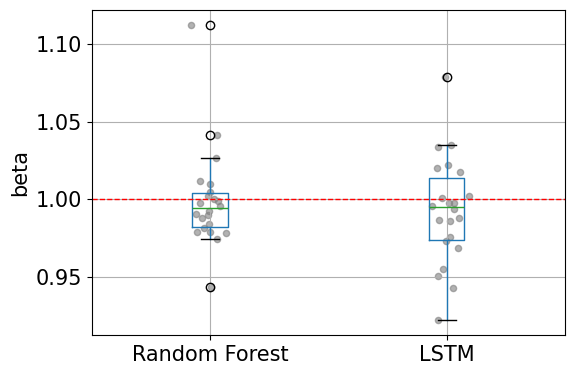

In [9]:
print(rf.columns)
print(lstm.columns)

merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')

merged_df_KGE_beta_comp = merged_df[ ['site_no', 'KGE_Beta', 'KGE_beta_comp'] ]

merged_df_KGE_beta_comp.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

merged_df_KGE_beta_comp['LSTM'] = merged_df_KGE_beta_comp['LSTM'].apply(lambda x: x[1:6])
merged_df_KGE_beta_comp['LSTM'] = merged_df_KGE_beta_comp['LSTM'].astype('float64')

print(merged_df_KGE_beta_comp.dtypes)

print("merged_df_KGE_beta_comp",merged_df_KGE_beta_comp)

plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(6, 4))

merged_df_KGE_beta_comp[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = merged_df_KGE_beta_comp[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

# Add horizontal line at y=1
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

ax.set_ylabel( "beta")
plt.tight_layout()

# Save the figure
plt.savefig("kge_beta.png")  # Saves as a PNG file

plt.show()

In [10]:
print("rf:",rf.head())
print("lstm:",lstm.head())

rmse_merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')

#merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[1:6])
#merged_df['KGE_y'] = merged_df['KGE_y'].astype('float64')

rmse_merged_df = rmse_merged_df[ ['site_no', 'RMSE', 'rmse'] ]

rmse_merged_df.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

#print(rmse_merged_df.dtypes)
print("merged_df",rmse_merged_df)

rf:    Unnamed: 0   site_no  number_of_obs       MSE      BIAS      RMSE  \
0           0  13310800           1103  0.315464 -0.217739  0.561662   
1           1  13192200            820  0.326945  0.144117  0.571791   
2           2  13311450           1098  0.357845 -0.174490  0.598202   
3           3  13311000           1101  0.386968 -0.117419  0.622068   
4           4  13154500           2088  0.410202 -0.041550  0.640470   

        NSE       KGE  KGE_Alpha  KGE_Beta  std_dev_st      cv_q  inter_cv_q  \
0  0.874394  0.926769   0.958528  0.974654    1.726251  1.057303    0.415897   
1  0.832725  0.859797   1.124802  1.012200    1.666903  0.489336    0.232474   
2  0.908933  0.907758   0.919909  0.981378    2.037784  0.935469    0.292900   
3  0.883396  0.939221   1.023751  0.988003    2.062030  1.093710    0.342235   
4  0.693833  0.729285   0.785208  0.997849    1.277700  0.357561    0.236465   

   inter_cv_st  range  autocorr_t_1  grid_std_ratio  grid_correlation  
0     0.04

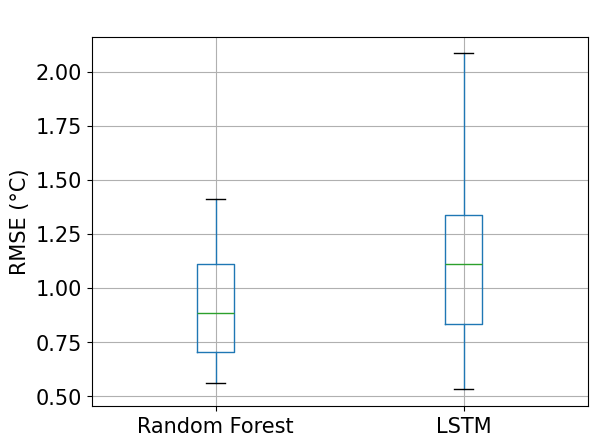

In [11]:
plt.rcParams['font.size'] = 15

rmse_merged_df[[ 'Random Forest', 'LSTM']].boxplot()
plt.title(" ")
plt.ylabel("RMSE (°C)")

plt.show()


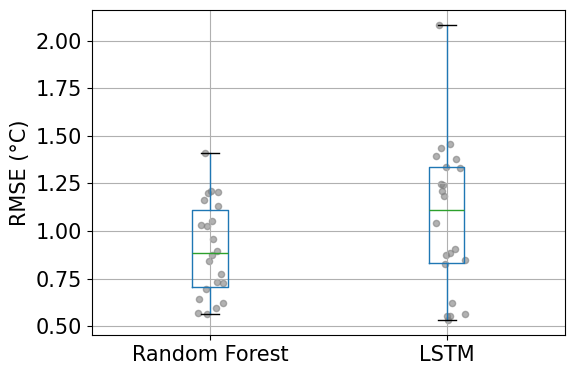

In [12]:
#import matplotlib.pyplot as plt
#import numpy as np

fig, ax = plt.subplots(figsize=(6, 4))

rmse_merged_df[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = rmse_merged_df[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

ax.set_ylabel( "RMSE (°C)")
plt.tight_layout()

# Save the figure
plt.savefig("rmse.png")  # Saves as a PNG file

plt.show()



     site_no                        labels   dam_and_diversion       amp  \
0   12305000   Low-Elevation Large Streams                 Dam  0.501713   
1   12322000   Low-Elevation Large Streams                 Dam  0.595400   
2   13092747  Mid-Elevation Medium Streams           Diversion  0.471255   
3   13150430  Mid-Elevation Medium Streams           Diversion  0.632628   
4   13154500   Low-Elevation Large Streams   Dam and diversion  0.439203   
5   13176400  Mid-Elevation Medium Streams  No flow regulation  0.945167   
6   13190500  Mid-Elevation Medium Streams   Dam and diversion  0.258282   
7   13192200  Mid-Elevation Medium Streams                 Dam  0.399247   
8   13211205   Low-Elevation Large Streams           Diversion  0.613282   
9   13213000   Low-Elevation Large Streams           Diversion  0.656940   
10  13296000  High-Elevation Small Streams  No flow regulation  0.567011   
11  13304050  High-Elevation Small Streams           Diversion  0.569762   
12  13307000

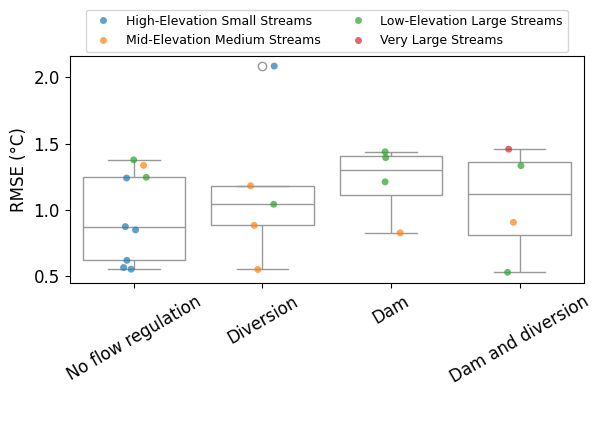

In [13]:
reg_kmean_pasta_path = '/content/drive/MyDrive/reg_kmean_pasta_path.csv'
reg_kmean_pasta = pd.read_csv( reg_kmean_pasta_path )
print(reg_kmean_pasta)

df = pd.merge( rmse_merged_df,  reg_kmean_pasta, left_on='site_no', right_on='site_no', how='inner')

print(df)

#df = rmse_merged_df
x = "dam_and_diversion"
y = "LSTM"
ylabel = "RMSE (°C)"
fontsize = 12

sns.boxplot(x= x, y= y , data= df, color = "white",   order= [ "No flow regulation"
                                                  ,"Diversion"
                                                  ,"Dam"
                                                  ,"Dam and diversion"
                                                  ]
           )

ax=sns.stripplot(x= x, y= y, data= df,
              hue="labels",
#              color='black',
              alpha=0.7, jitter=True
             # , dodge=True
             )

# Remove the legend title
ax.legend(title=None , loc='upper center' ,bbox_to_anchor=(0.5, 1.23) , ncol=2, fontsize=  9
         )

plt.xticks(rotation= 30 , fontsize= fontsize )

plt.yticks(  fontsize= fontsize )

plt.xlabel(" ")
plt.ylabel( ylabel , fontsize= fontsize  )
plt.title(" ")

plt.tight_layout()




# Save as EPS
plt.savefig(' .eps', format='eps', dpi=500)

# Save with higher DPI, specific quality, and tight bounding box
plt.savefig(' .jpg', dpi=400
             #, bbox_inches='tight'
             )

plt.show()

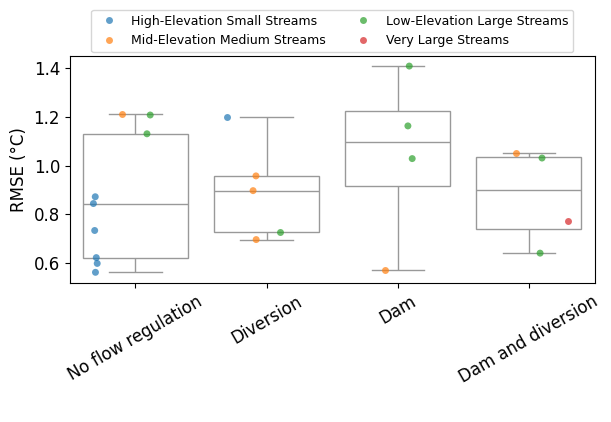

In [14]:
x = "dam_and_diversion"
y = "Random Forest"
ylabel = "RMSE (°C)"
fontsize = 12

sns.boxplot(x= x, y= y , data= df, color = "white",   order= [ "No flow regulation"
                                                  ,"Diversion"
                                                  ,"Dam"
                                                  ,"Dam and diversion"
                                                  ]
           )

ax=sns.stripplot(x= x, y= y, data= df,
              hue="labels",
#              color='black',
              alpha=0.7, jitter=True
             , dodge=True
             )

ax.legend(title=None , loc='upper center' ,bbox_to_anchor=(0.5, 1.23) , ncol=2, fontsize=  9         )

plt.xticks(rotation= 30 , fontsize= fontsize )
plt.yticks(  fontsize= fontsize )


plt.xlabel(" ")
plt.ylabel( ylabel , fontsize= fontsize  )
#plt.title(" ")

plt.tight_layout()

plt.savefig('reg_rf_rmse.eps', format='eps', dpi=500)
plt.savefig('reg_rf_rmse.jpg', dpi=400, bbox_inches='tight')

plt.show()

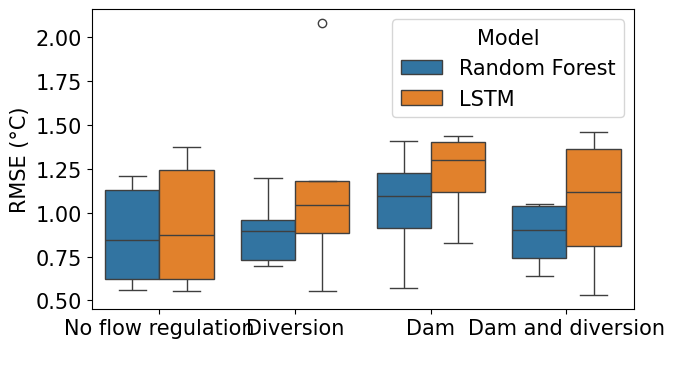

In [15]:
#import pandas as pd
#import seaborn as sns          # or use matplotlib directly—Seaborn just saves keystrokes
#import matplotlib.pyplot as plt

# df already contains: 'Random Forest', 'LSTM', 'dam_and_diversion'
long = df.melt(
    id_vars='dam_and_diversion',            # columns to keep as‑is
    value_vars=['Random Forest', 'LSTM'],   # columns to unpivot
    var_name='Model',                       # new column with model names
    value_name='Metric'                     # new column with the values
)

plt.figure(figsize=(7,4))
sns.boxplot(
    data=long,
    x='dam_and_diversion',    # category on the x‑axis
    y='Metric',               # numeric values
    hue='Model',              # one box per model inside each category
    dodge=True                # keeps the boxes side‑by‑side
    ,   order= [ "No flow regulation"
                                                  ,"Diversion"
                                                  ,"Dam"
                                                  ,"Dam and diversion"
                                                  ]
)
plt.xlabel(' ')
plt.ylabel( "RMSE (°C)")
#plt.legend(title='Model')
plt.tight_layout()
plt.show()


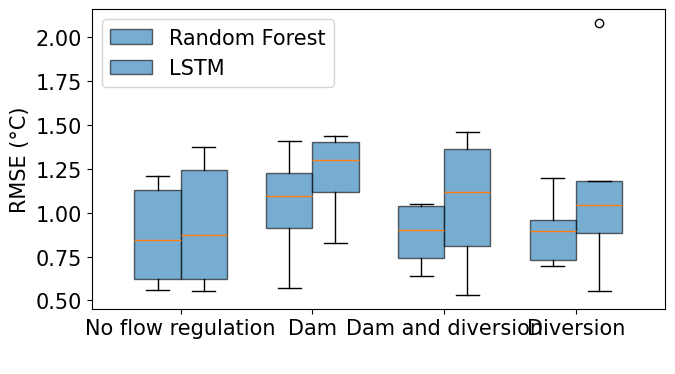

In [16]:
#import matplotlib.pyplot as plt
#import numpy as np

cats = df['dam_and_diversion'].unique()
positions = np.arange(len(cats))

data_rf = [df.loc[df['dam_and_diversion'] == c, 'Random Forest'] for c in cats]
data_lstm = [df.loc[df['dam_and_diversion'] == c, 'LSTM'] for c in cats]

width = 0.35  # space between the two boxes per category
fig, ax = plt.subplots(figsize=(7,4))

bp1 = ax.boxplot(
    data_rf,
    positions=positions - width/2,
    widths=width,
    patch_artist=True,
    boxprops=dict(alpha=0.6)
)
bp2 = ax.boxplot(
    data_lstm,
    positions=positions + width/2,
    widths=width,
    patch_artist=True,
    boxprops=dict(alpha=0.6)
)

ax.set_xticks(positions)
ax.set_xticklabels(cats)
ax.set_xlabel(' ')
ax.set_ylabel('RMSE (°C)')
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Random Forest', 'LSTM'])
plt.tight_layout()
plt.show()
